# Global Infectious Disease Mortality Analysis

This notebook explores mortality trends caused by major infectious diseases across global regions.

##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno
import matplotlib as mpl

## Data loading

In [ ]:
df = pd.read_csv('data/mortality.csv')

I choose a style

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

Import the dataset

In [ ]:
data_path = 'data/annual_deaths_by_causes.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


## Data overview
We inspect the structure of the dataset and check for missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

In [ ]:
df.describe()

,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


In [ ]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace("'", "", regex=False)
    .str.replace(" ", "_")
)

In [ ]:
threshold = 0.7 * len(df)
df = df.dropna(axis=1, thresh=threshold)

In [ ]:
death_cols = df.select_dtypes(include='float').columns
df = df.dropna(subset=death_cols)


## Data preprocessing
Country-level data is mapped to global regions and aggregated by year.

In [ ]:
region_map = {
    'Argentina': 'Latin America',
    'Brazil': 'Latin America',
    'Chile': 'Latin America',
    'Uruguay': 'Latin America',
    'Peru': 'Latin America',
    'Mexico': 'Latin America',

    'United States': 'North America',
    'Canada': 'North America',

    'Spain': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'United Kingdom': 'Europe',

    'China': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia',

    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}


In [ ]:
df['region'] = df['country'].map(region_map)

In [ ]:
df_regions = df.dropna(subset=['region'])

In [ ]:
df_region_year = (
    df_regions
    .groupby(['region', 'year'])
    .sum(numeric_only=True)
    .reset_index()
)

In [ ]:
df_regions['region'].value_counts()

,count
region,
Latin America,180
Europe,150
Asia,90
Oceania,60
North America,60
Africa,60


## Exploratory data analysis
The following charts show temporal trends of major infectious diseases by region.

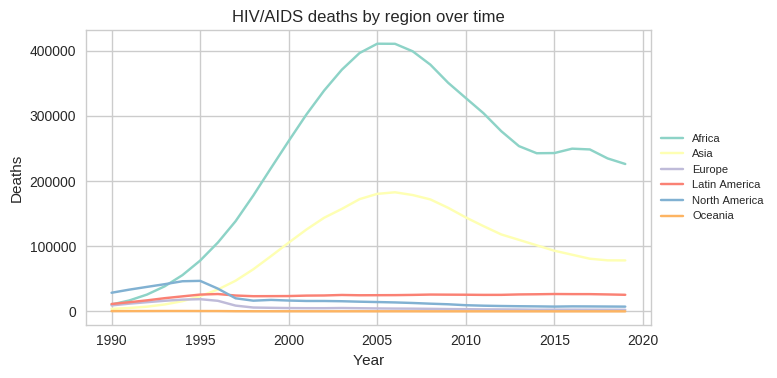

In [ ]:
plt.figure(figsize=(8,4))

for region in df_region_year['region'].unique():
    data = df_region_year[df_region_year['region'] == region]
    plt.plot(data['year'], data['hiv/aids'], label=region)

plt.title('HIV/AIDS deaths by region over time')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend(
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

Most regions show a declining trend, with notable differences in magnitude and variability.

In [ ]:
region_selected = 'Latin America'

df_latam = df_regions[df_regions['region'] == region_selected]

In [ ]:
df_latam['country'].nunique()

6

In [ ]:
df_latam_year = (
    df_latam
    .groupby('year')
    .sum(numeric_only=True)
    .reset_index()
)

In [56]:
causes = [
    'tuberculosis',
    'hiv/aids',
    'malaria',
    'lower_respiratory_infections',
    'diarrheal_diseases'
]

In [57]:
df_latam_norm = df_latam_year.copy()

for c in causes:
    df_latam_norm[c] = (
        df_latam_norm[c] - df_latam_norm[c].min()
    ) / (
        df_latam_norm[c].max() - df_latam_norm[c].min()
    )

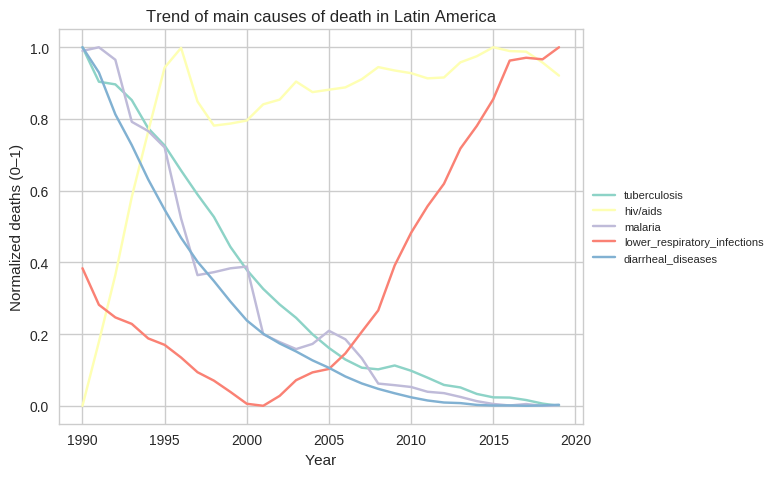

In [58]:
plt.figure(figsize=(8,5))

for c in causes:
    plt.plot(df_latam_norm['year'], df_latam_norm[c], label=c)

plt.title(f'Trend of main causes of death in {region_selected}')
plt.xlabel('Year')
plt.ylabel('Normalized deaths (0–1)')
plt.legend(
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.tight_layout()
plt.show()

HIV/AIDS and lower respiratory infections consistently present the highest mortality values in Latin America across the analyzed period.

In [ ]:
mean_deaths = df_latam_year[causes].mean().sort_values(ascending=False)
mean_deaths

,0
cardiovascular_diseases,579646.100000
neoplasms,383918.366667
chronic_respiratory_diseases,110452.366667
diabetes_mellitus,103720.233333
road_injuries,77994.666667
acute_hepatitis,676.833333


The analysis indicates that cardiovascular diseases are the dominant cause of death, with neoplasms and chronic respiratory diseases ranking second and third respectively.